In [440]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [441]:
data_path = './../data'

## NSW actual demand

In [442]:
nsw_totaldemand = pd.read_csv(os.path.join(data_path, 'NSW', 'totaldemand_nsw.csv'), parse_dates=['DATETIME'], dayfirst=True)

In [443]:
nsw_totaldemand.head()

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1


In [444]:
nsw_totaldemand.tail()

,DATETIME,TOTALDEMAND,REGIONID
196508,2021-03-17 22:00:00,7419.77,NSW1
196509,2021-03-17 22:30:00,7417.91,NSW1
196510,2021-03-17 23:00:00,7287.32,NSW1
196511,2021-03-17 23:30:00,7172.39,NSW1
196512,2021-03-18 00:00:00,7094.51,NSW1


In [445]:
nsw_totaldemand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     196513 non-null  datetime64[ns]
 1   TOTALDEMAND  196513 non-null  float64       
 2   REGIONID     196513 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ MB


In [446]:
nsw_totaldemand['TOTALDEMAND'].describe()

count    196513.000000
mean       8113.145859
std        1299.532774
min        5074.630000
25%        7150.070000
50%        8053.230000
75%        8958.550000
max       14579.860000
Name: TOTALDEMAND, dtype: float64

In [447]:
nsw_totaldemand.shape

(196513, 3)

In [448]:
nsw_totaldemand.min()

DATETIME       2010-01-01 00:00:00
TOTALDEMAND                5074.63
REGIONID                      NSW1
dtype: object

In [449]:
nsw_totaldemand.max()

DATETIME       2021-03-18 00:00:00
TOTALDEMAND               14579.86
REGIONID                      NSW1
dtype: object

In [450]:
nsw_totaldemand.isnull().sum()

DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

In [451]:
nsw_totaldemand.isna().sum()

DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

In [452]:
nsw_totaldemand.nunique()

DATETIME       196513
TOTALDEMAND    160515
REGIONID            1
dtype: int64

In [453]:
nsw_totaldemand.dtypes

DATETIME       datetime64[ns]
TOTALDEMAND           float64
REGIONID               object
dtype: object

## NSW actual temperature

In [454]:
nsw_temperature = pd.read_csv(os.path.join(data_path, 'NSW', 'temperature_nsw.csv'), parse_dates=['DATETIME'], dayfirst=True)

In [455]:
nsw_temperature.head()

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,2010-01-01 00:00:00,23.1
1,Bankstown,2010-01-01 00:01:00,23.1
2,Bankstown,2010-01-01 00:30:00,22.9
3,Bankstown,2010-01-01 00:50:00,22.7
4,Bankstown,2010-01-01 01:00:00,22.6


In [456]:
nsw_temperature.tail()

,LOCATION,DATETIME,TEMPERATURE
220321,Bankstown,2021-03-17 23:00:00,19.1
220322,Bankstown,2021-03-17 23:20:00,19.0
220323,Bankstown,2021-03-17 23:30:00,18.8
220324,Bankstown,2021-03-17 23:34:00,18.8
220325,Bankstown,2021-03-18 00:00:00,18.6


In [457]:
nsw_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     220326 non-null  object        
 1   DATETIME     220326 non-null  datetime64[ns]
 2   TEMPERATURE  220326 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.0+ MB


In [458]:
nsw_temperature.describe()

,DATETIME,TEMPERATURE
count,220326,220326.000000
mean,2015-08-16 07:59:12.964243712,17.418827
min,2010-01-01 00:00:00,-1.300000
25%,2012-11-02 23:07:30,13.400000
50%,2015-08-16 13:45:00,17.700000
75%,2018-06-03 14:22:30,21.300000
max,2021-03-18 00:00:00,44.700000
std,NaN,5.849763


In [459]:
nsw_temperature.shape

(220326, 3)

In [460]:
nsw_temperature.min()

LOCATION                 Bankstown
DATETIME       2010-01-01 00:00:00
TEMPERATURE                   -1.3
dtype: object

In [461]:
nsw_temperature.max()

LOCATION                 Bankstown
DATETIME       2021-03-18 00:00:00
TEMPERATURE                   44.7
dtype: object

In [462]:
nsw_temperature.isnull().sum()

LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64

In [463]:
nsw_temperature.isna().sum()

LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64

In [464]:
nsw_temperature.nunique()

LOCATION            1
DATETIME       220313
TEMPERATURE       439
dtype: int64

In [465]:
nsw_temperature.dtypes

LOCATION               object
DATETIME       datetime64[ns]
TEMPERATURE           float64
dtype: object

## NSW forecast Demand

In [466]:
nsw_forecastdemand = pd.read_csv(os.path.join(data_path, 'NSW', 'forecastdemand_nsw.csv'), parse_dates=['LASTCHANGED', 'DATETIME'])

In [467]:
nsw_forecastdemand.head()

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2009123018,NSW1,71,7832.04,2009-12-30 12:31:49,2010-01-01
1,2009123019,NSW1,70,7832.04,2009-12-30 13:01:43,2010-01-01
2,2009123020,NSW1,69,7832.03,2009-12-30 13:31:36,2010-01-01
3,2009123021,NSW1,68,7832.03,2009-12-30 14:01:44,2010-01-01
4,2009123022,NSW1,67,7830.96,2009-12-30 14:31:35,2010-01-01


In [468]:
nsw_forecastdemand.tail()

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
10906014,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18
10906015,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18
10906016,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18
10906017,2021031739,NSW1,2,7087.28,2021-03-17 23:01:36,2021-03-18
10906018,2021031740,NSW1,1,7126.37,2021-03-17 23:31:33,2021-03-18


In [469]:
nsw_forecastdemand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906019 entries, 0 to 10906018
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 499.2+ MB


In [470]:
nsw_forecastdemand['FORECASTDEMAND'].describe()

count    1.090602e+07
mean     8.066719e+03
std      1.315959e+03
min      4.422460e+03
25%      7.077970e+03
50%      8.007550e+03
75%      8.925610e+03
max      1.473666e+04
Name: FORECASTDEMAND, dtype: float64

In [471]:
nsw_forecastdemand.shape

(10906019, 6)

In [472]:
nsw_forecastdemand.min()

PREDISPATCHSEQNO             2009123018
REGIONID                           NSW1
PERIODID                              1
FORECASTDEMAND                  4422.46
LASTCHANGED         2009-12-30 12:31:49
DATETIME            2010-01-01 00:00:00
dtype: object

In [473]:
nsw_forecastdemand.max()

PREDISPATCHSEQNO             2021031740
REGIONID                           NSW1
PERIODID                             79
FORECASTDEMAND                 14736.66
LASTCHANGED         2021-03-17 23:31:33
DATETIME            2021-03-18 00:00:00
dtype: object

In [474]:
nsw_forecastdemand.isnull().sum()

PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

In [475]:
nsw_forecastdemand.isna().sum()

PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

In [476]:
nsw_forecastdemand.nunique()

PREDISPATCHSEQNO    196571
REGIONID                 1
PERIODID                79
FORECASTDEMAND      681384
LASTCHANGED         196571
DATETIME            196513
dtype: int64

In [477]:
nsw_forecastdemand.dtypes

PREDISPATCHSEQNO             int64
REGIONID                    object
PERIODID                     int64
FORECASTDEMAND             float64
LASTCHANGED         datetime64[ns]
DATETIME            datetime64[ns]
dtype: object

# merge

In [478]:
merged_df  = pd.merge(nsw_totaldemand, nsw_forecastdemand, on='DATETIME', how='outer')
merged_df.head()

,DATETIME,TOTALDEMAND,REGIONID_x,PREDISPATCHSEQNO,REGIONID_y,PERIODID,FORECASTDEMAND,LASTCHANGED
0,2010-01-01,8038.0,NSW1,2009123018,NSW1,71,7832.04,2009-12-30 12:31:49
1,2010-01-01,8038.0,NSW1,2009123019,NSW1,70,7832.04,2009-12-30 13:01:43
2,2010-01-01,8038.0,NSW1,2009123020,NSW1,69,7832.03,2009-12-30 13:31:36
3,2010-01-01,8038.0,NSW1,2009123021,NSW1,68,7832.03,2009-12-30 14:01:44
4,2010-01-01,8038.0,NSW1,2009123022,NSW1,67,7830.96,2009-12-30 14:31:35


In [479]:
nsw_df = pd.merge(merged_df, nsw_temperature, on='DATETIME', how='outer')
nsw_df.head()

,DATETIME,TOTALDEMAND,REGIONID_x,PREDISPATCHSEQNO,REGIONID_y,PERIODID,FORECASTDEMAND,LASTCHANGED,LOCATION,TEMPERATURE
0,2010-01-01,8038.0,NSW1,2.009123e+09,NSW1,71.0,7832.04,2009-12-30 12:31:49,Bankstown,23.1
1,2010-01-01,8038.0,NSW1,2.009123e+09,NSW1,70.0,7832.04,2009-12-30 13:01:43,Bankstown,23.1
2,2010-01-01,8038.0,NSW1,2.009123e+09,NSW1,69.0,7832.03,2009-12-30 13:31:36,Bankstown,23.1
3,2010-01-01,8038.0,NSW1,2.009123e+09,NSW1,68.0,7832.03,2009-12-30 14:01:44,Bankstown,23.1
4,2010-01-01,8038.0,NSW1,2.009123e+09,NSW1,67.0,7830.96,2009-12-30 14:31:35,Bankstown,23.1


In [480]:
nsw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10931558 entries, 0 to 10931557
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DATETIME          datetime64[ns]
 1   TOTALDEMAND       float64       
 2   REGIONID_x        object        
 3   PREDISPATCHSEQNO  float64       
 4   REGIONID_y        object        
 5   PERIODID          float64       
 6   FORECASTDEMAND    float64       
 7   LASTCHANGED       datetime64[ns]
 8   LOCATION          object        
 9   TEMPERATURE       float64       
dtypes: datetime64[ns](2), float64(5), object(3)
memory usage: 834.0+ MB


In [481]:
nsw_df.shape

(10931558, 10)

In [482]:
nsw_df.describe()

,DATETIME,TOTALDEMAND,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,LASTCHANGED,TEMPERATURE
count,10931558,1.090718e+07,1.090718e+07,1.090718e+07,1.090718e+07,10907179,1.090032e+07
mean,2015-08-09 23:36:24.326843904,8.070015e+03,2.015175e+09,2.997946e+01,8.066655e+03,2015-08-09 06:35:50.843740672,1.734006e+01
min,2010-01-01 00:00:00,5.074630e+03,2.009123e+09,1.000000e+00,4.422460e+03,2009-12-30 12:31:49,-1.300000e+00
25%,2012-10-20 15:30:00,7.097160e+03,2.012102e+09,1.400000e+01,7.077860e+03,2012-10-19 18:31:35,1.330000e+01
50%,2015-08-09 23:00:00,8.001810e+03,2.015081e+09,2.800000e+01,8.007430e+03,2015-08-09 05:01:11,1.770000e+01
75%,2018-05-29 12:00:00,8.915040e+03,2.018053e+09,4.400000e+01,8.925555e+03,2018-05-28 19:01:44,2.130000e+01
max,2021-03-18 00:00:00,1.457986e+04,2.021032e+09,7.900000e+01,1.473666e+04,2021-03-17 23:31:33,4.470000e+01
std,NaN,1.309122e+03,3.234590e+06,1.869705e+01,1.315934e+03,NaN,5.818556e+00


In [483]:
nsw_df.isnull().sum()

DATETIME                0
TOTALDEMAND         24379
REGIONID_x          24379
PREDISPATCHSEQNO    24379
REGIONID_y          24379
PERIODID            24379
FORECASTDEMAND      24379
LASTCHANGED         24379
LOCATION            31243
TEMPERATURE         31243
dtype: int64

In [484]:
nsw_df.isna().sum()

DATETIME                0
TOTALDEMAND         24379
REGIONID_x          24379
PREDISPATCHSEQNO    24379
REGIONID_y          24379
PERIODID            24379
FORECASTDEMAND      24379
LASTCHANGED         24379
LOCATION            31243
TEMPERATURE         31243
dtype: int64

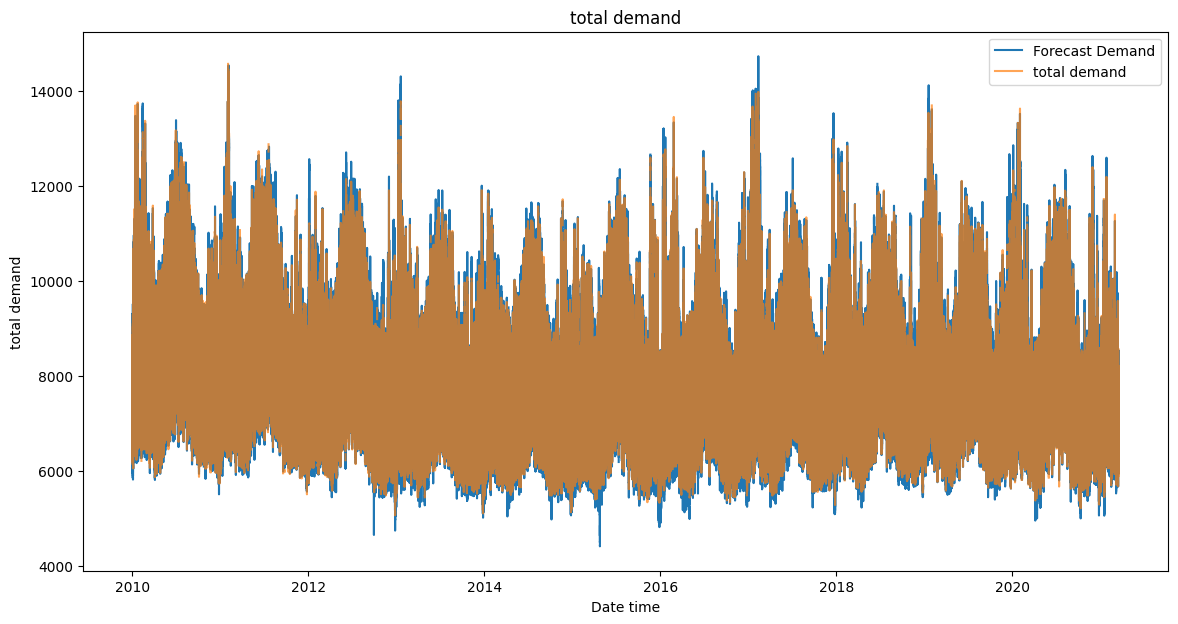

In [485]:


plt.figure(figsize=(14, 7))
plt.plot(nsw_df['DATETIME'], nsw_df['FORECASTDEMAND'], label='Forecast Demand')
plt.plot(nsw_df['DATETIME'], nsw_df['TOTALDEMAND'], label='total demand', alpha=0.7)
plt.xlabel('Date time')
plt.ylabel('total demand')
plt.title('total demand')
plt.legend()
plt.show()

# Line plot

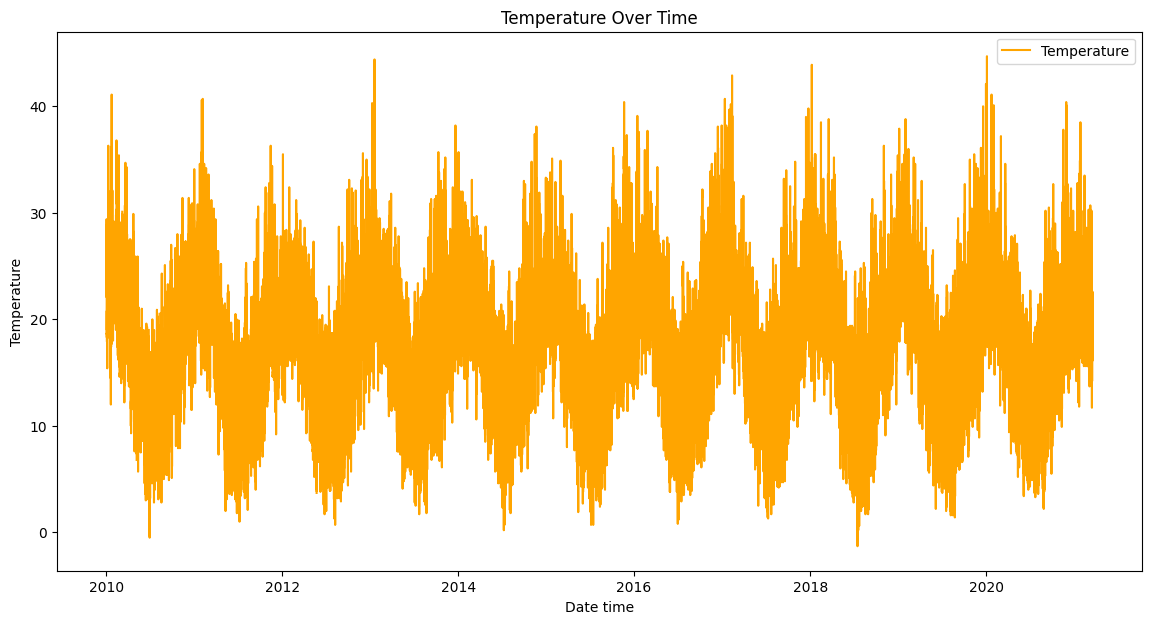

In [486]:
plt.figure(figsize=(14, 7))
plt.plot(nsw_df['DATETIME'], nsw_df['TEMPERATURE'], color='orange', label='Temperature')
plt.xlabel('Date time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

# Scatter plot

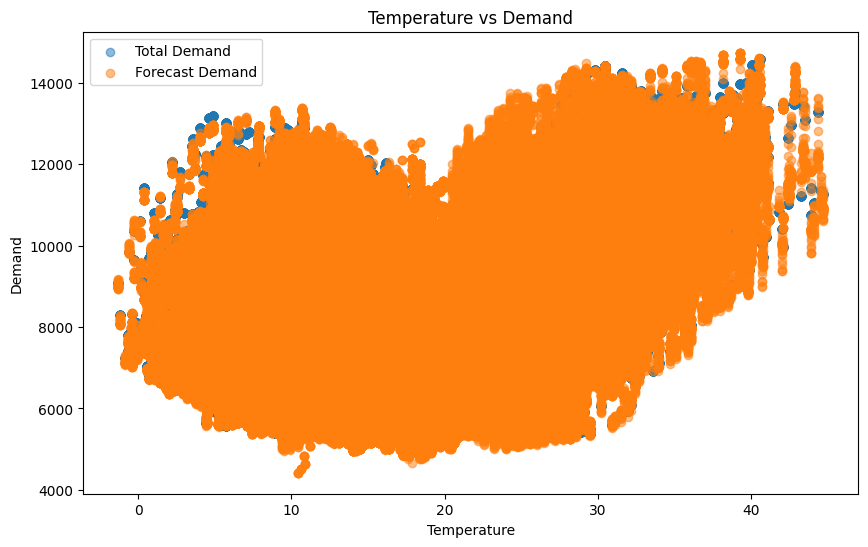

In [487]:
plt.figure(figsize=(10, 6))
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['TOTALDEMAND'], label='Total Demand', alpha=0.5)
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['FORECASTDEMAND'], label='Forecast Demand', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Temperature vs Demand')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

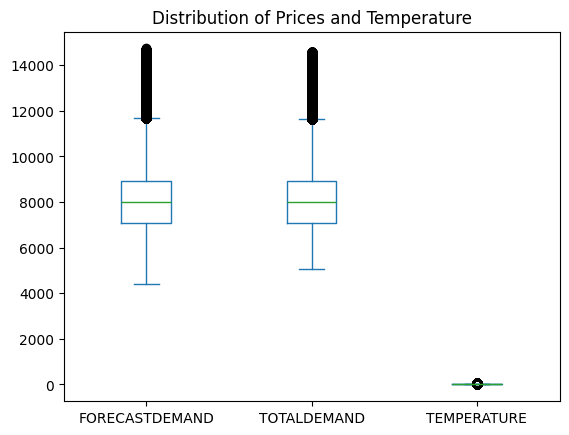

In [488]:
plt.figure(figsize=(12, 6))
nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].plot(kind='box')
plt.title('Distribution of Prices and Temperature')
plt.show()

# Histogram

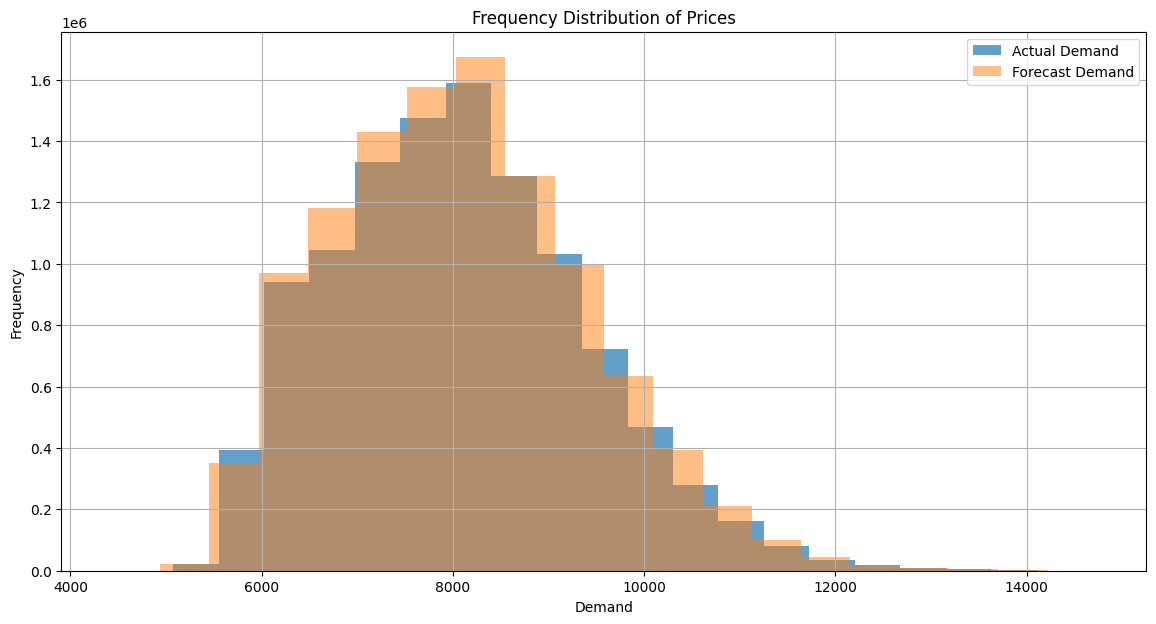

In [489]:
plt.figure(figsize=(14, 7))
nsw_df['TOTALDEMAND'].hist(alpha=0.7, label='Actual Demand', bins=20)
nsw_df['FORECASTDEMAND'].hist(alpha=0.5, label='Forecast Demand', bins=20)
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Prices')
plt.legend()
plt.show()

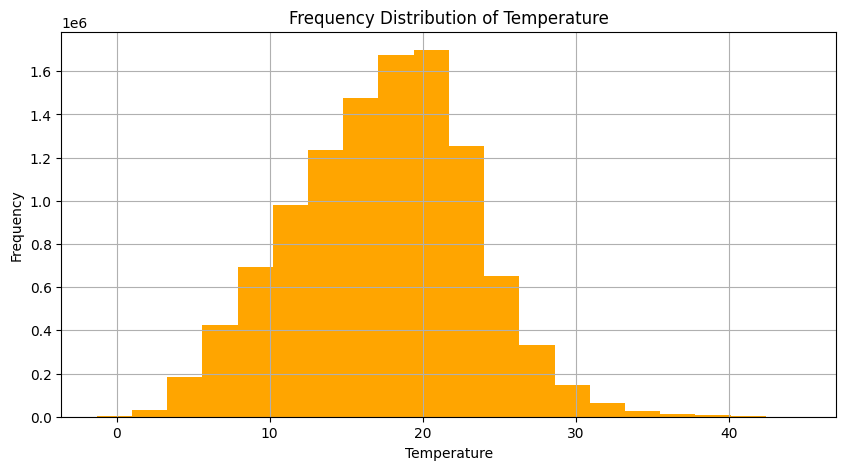

In [490]:
plt.figure(figsize=(10, 5))
nsw_df['TEMPERATURE'].hist(color='orange', bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Temperature')
plt.show()

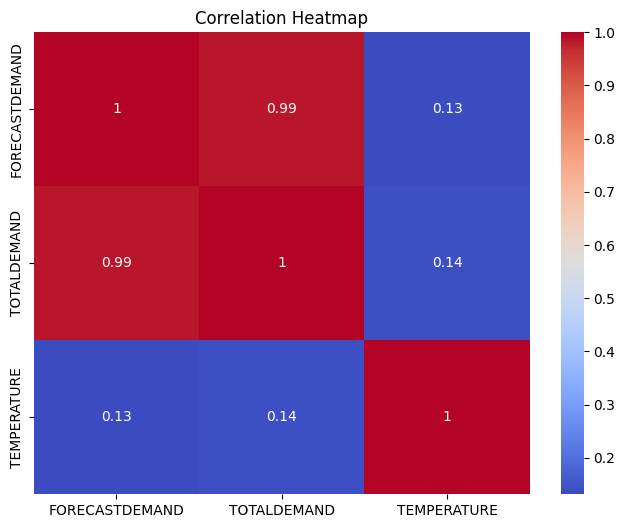

In [491]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()